# Advanced NLP Assignment2

### Name : Saikrishna Javvadi
### Student ID: 20236648

**Assignment 2** focuses on the training on a Neural Machine Translation (NMT) system with an attention model.

This is an **individual assignment** and usual rules for plagiarism apply! With this you agree that: "In submitting this work I confirm that it is entirely my own. I acknowledge that I may be invited to online interview if there is any concern in relation to the integrity of my exam." 

**Write comments and documentation.**



## Section 1- Data Collection and Preprocessing 


---


**Task 1  (5 marks)**

---

There are few datasets to train an NMT system available from the OPUS project (http://opus.nlpl.eu/).

*  Download a language pair (preferably European language) and **extract** the file(s) and upload it to CoLab
*  Create a list of lines by splitting the text file at every occurrence accordingly, i.e. source and target language
*  Print number of sentences
*  Limit the number of sentences to 10,000 lines (but more than 5,000 lines)
*  Split the data into train, development and test set
*  Print 100th sentence in original script for source and target language

The dataset was downlaoded from the [opus](http://opus.nlpl.eu/) website. To be  specific, it was downloaded from the https://opus.nlpl.eu/opus-100.php link which contains English-centric multilingual corpus covering 100 languages.I choose the Language pair English-German. Also there are multiple other language pairs available which are specific to few domains/topics, I choose this because this had more general sentences.

Since the dataset is huge and there are few sentences with maximum length >50, I'm removing all those sentences which have length >10 in both English Corpora and German Corpora, it helps to reduce the dimensionality of vectors created and hence reduces the RAM used for the program, which otherwise was crashing down due to the large size of sentences.


The exact corpus files used in the assignment can be downloaded from the [link](https://nuigalwayie-my.sharepoint.com/:f:/g/personal/s_javvadi3_nuigalway_ie/EmZCQSc5_cFJpLzn0_h0BvUB8qZ_ATWw1POlULtgf6Yv2A?e=RGIJHh) if needed.

In [ ]:
import nltk 
nltk.download("all")

In [ ]:
# function that takes in filenames of english and german corpora in a list and returns two lists
#containing 10000 english and 10000 german sentences respectively which are of size less than 11(max length)
def get_sentences(filenames):

  with open(filenames[0], "r", encoding="utf-8") as ef:
    eng_content=ef.read()                           #reading the content of file to string 
    eng_sentences = eng_content.split("\n")        #splitting the content on '\n' to create a list of sentences from the file

  with open(filenames[1], "r", encoding="utf-8") as gf:
    german_content=gf.read()                              #reading the content of file to string 
    german_sentences = german_content.split("\n")        #splitting the content on '\n' to create a list of sentences from the file


  #filtering out only those sentences which have less than 10 words in both English and German Corpora
  eng_sents =[]         #list to add filtered english sentences with max length less than 10 
  german_sents =[]      #list to add filtered german sentences with max length less than 10 
  i = 0
  #Iterating through each english and respective german translation
  for eng_line,german_line in zip(eng_sentences,german_sentences):
    eng_words = nltk.word_tokenize(eng_line)         #tokenizing the english sentence into words
    german_words = nltk.word_tokenize(german_line)    #tokenizing the  german sentence into words
    if len(eng_words) <= 10 and len(german_words) <=10:      #checking if the size of all the words in sentence is less than 10
      eng_sents.append(eng_sentences[i])                #appending to the new english sentences list
      german_sents.append(german_sentences[i])          #appending to the new german sentences list
    i = i+1

  #limiting the number of sentences to 10000
  if(len(eng_sentences)>10000):
    eng_sents = eng_sents[0:10000]
    german_sents = german_sents[0:10000]

  return eng_sents, german_sents      #returning the lists of English and German sentences

In [ ]:
#the training corpora of both the languages
corpus_list = ["opus.de-en-train.en","opus.de-en-train.de"]   

# obtain list of sentences in source(English) and target(german) corpora 
eng_sentences , german_sentences = get_sentences(corpus_list)

#Printing the number of sentences
print("Total number of English Sentences: ",len(eng_sentences))
print("Total number of German Sentences: ",len(german_sentences))

Total number of English Sentences:  10000
Total number of German Sentences:  10000


In [ ]:
#printing the 100th sentence in both original and translated languages
print(eng_sentences[99])
print(german_sentences[99])

What the hell am I looking at?
Was zum Teufel hab ich hier vor mir?


In [ ]:
eng_sentences[-5:]

["OK, I'm coming.",
 'Oh, hey, buddy.',
 'Pratt, Morris, Gates.',
 'Max, this is Scarlett.',
 '26:52']

In [ ]:
german_sentences[-5:]

['OK, ich komme.',
 'Hey, Mann.',
 'Pratt, Morris, Gates.',
 'Max, das ist Scarlett.',
 '26:51']

**Task 2 (5 marks)** 

---

* Add '<bof\>' to denote beginning of sentence and '<eos\>' to denote the end of the sentence to each target line.
* Perform the pre-processing step of the text.
* Print the last 5 sentences of the preprocessed text.
* Print statistics on the selected dataset:
  * Number of samples
  * Number of unique source language tokens
  * Number of unique target language tokens
  * Max sequence length of source language
  * Max sequence length of target language
  * Source Vocabulary
  * Target Vocabulary





### Data Pre-processing

- In this part, after performing the pre-processing of data , For the model to be able to distinguish when the sentence starts and ends , we use 'bof_'(start) and '_eos'(end) tokens to the german(target) sentences.

- Then create the vocabulary of all unique english and german words to use them later while creating word embeddings.


### References : 
- https://machinelearningmastery.com/develop-neural-machine-translation-system-keras/


In [ ]:
#Reference : CT5121-Week7 Lab & https://machinelearningmastery.com/develop-neural-machine-translation-system-keras/

#In this pre-processing step , we are converting the words to lowercase, removing numbers and any punctuations , for the model to actually
#concentrate only on developing meaningful sentences, but these might be very much needed if we are trying to build a really good model.

import string
import re
from unicodedata import normalize
from numpy import array

# function to clean a list of sentences
def clean_lines(sentences):
	#initialising a empty list
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for sentence in sentences:
    # normalize unicode characters
		sentence = normalize('NFD', sentence).encode('ascii', 'ignore')
		sentence = sentence.decode('UTF-8')
		# tokenize on white space
		sentence = sentence.split()
		# convert to lowercase
		sentence = [word.lower() for word in sentence]
		# remove punctuation from each token
		sentence = [word.translate(table) for word in sentence]
		# remove non-printable chars form each token
		sentence = [re_print.sub('', w) for w in sentence]
		# remove tokens with numbers in them
		sentence = [word for word in sentence if word.isalpha()]
		cleaned.append(' '.join(sentence))
	return cleaned

In [ ]:
#cleaned english/source sentences
eng_sentences = clean_lines(eng_sentences)
print(len(eng_sentences))
eng_sentences[-5:]

10000


['ok im coming',
 'oh hey buddy',
 'pratt morris gates',
 'max this is scarlett',
 '']

In [ ]:
#cleaned german/target sentences
german_sentences = clean_lines(german_sentences)

#adding 'bof_' and '_eos' tokens at the start and end of the sentences
# I didn't use <bof> and <eos> tokens here as nltk tokenizer was splitting <bof> as <,bof,>
german_sentences  = [ 'bof_ ' + line + ' _eos' for line in german_sentences]

print(len(german_sentences))
german_sentences[-5:]

10000


['bof_ ok ich komme _eos',
 'bof_ hey mann _eos',
 'bof_ pratt morris gates _eos',
 'bof_ max das ist scarlett _eos',
 'bof_  _eos']

In [ ]:
#function to get all the english vocabulary in the corpus and the maximum length of sentence
# Since we restricted the sentence lengths to 10 in the beginning, 
#it's obvious we will 10 as max length for english sentences,
# and as we added bof_ and _eos tokens to german sentences their max length would be 12, but just adding some code here to recheck
def get_vocabulary(sentences):
  vocab=set()
  max_length = 0
  #Iterating through each sentence in the sentences list
  for line in sentences:
    #word tokenising the sentence
    words = nltk.word_tokenize(line)
    # updating max length is larger sentence is found
    if len(words)> max_length:
      max_length = len(words)
    #for each word in the tokenized words, if it's not in the vocabulary, add it to the vocabulary
    for word in words:
      if word not in vocab:
          vocab.add(word)
  #returning a sorted list of vocabulary and maximum length
  return sorted(list(vocab)),max_length

In [ ]:
#English vocabulary(sorted list of all the words in the corpus), max sentence length for english
eng_vocabulary,max_eng_sent_length = get_vocabulary(eng_sentences)
print("Vocabulary length: ",len(eng_vocabulary))
max_eng_sent_length

Vocabulary length:  7750


10

In [ ]:
#German vocabulary(sorted list of all the words in the corpus), max sentence length for german
german_vocabulary,max_german_sent_length = get_vocabulary(german_sentences)
print(len(german_vocabulary))
max_german_sent_length

8990


12

In [ ]:
# Total number of unique source and target language tokens
tot_eng_tokens = len(eng_vocabulary)
tot_german_tokens = len(german_vocabulary)

In [ ]:
print('Total number of examples: ', len(eng_sentences))
print('Total number of unique source(English) language tokens: ', tot_eng_tokens)
print('Total number of unique target(German) language tokens: ', tot_german_tokens)
print('Maximum sequence length of source(English) language: ', max_eng_sent_length)
print('Maximum sequence length of target(German) language: ', max_german_sent_length)
#print("Source Vocabulary",eng_vocabulary)
#print("Target Vocabulary",german_vocabulary)

In [ ]:
# split into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(eng_sentences,german_sentences, test_size=1/4, random_state= 100)
#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)

**Task 3 (5 marks)** 

---

---

*  Assign each unique word an integer value (5 marks).
*  Create word embedding for your vocabulary using pre-trained embeddings, for example GloVe or fastText (10 marks) (https://nlp.stanford.edu/projects/glove/ , https://fasttext.cc/docs/en/english-vectors.html)
* Print the first line of the embeddings (see below) 

### Word Embeddings

- In this task, firstly we assign assign an integer value to each unique token in the voacubulary \
- The Glove file that contains pre-trained embeddings is loaded and then
by parsing the data dump of pre-trained embeddings, we create an index that maps words to known embeddings. \
- Then we can construct the embedding matrix using the embedding index dictionary and the word index created previously \

In [ ]:
import numpy as np

In [ ]:
# assign an integer value to each unique token in the voacubulary
input_token_index = dict([(word,i) for i, word in enumerate(eng_vocabulary)])
target_token_index= dict([(word,i) for i, word in enumerate(german_vocabulary)])

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-05-30 09:54:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-30 09:54:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-30 09:54:13--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
# Reference : https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

#The Glove file that contains pre-trained embeddings is loaded and then
# by parsing the data dump of pre-trained embeddings, we create an index that maps words to known embeddings.
embeddings_index = {}
f = open('glove.6B.50d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [ ]:
#construct the embedding matrix using the embedding index dictionary and the word index created previously
max_words = tot_eng_tokens - 1
embedding_matrix = np.zeros((tot_eng_tokens, 50))
for i, word in enumerate(list(eng_vocabulary)):
    if i > max_words:
        continue
    embedding_vector = embeddings_index.get(word) 
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
print("First line of embedding: \n", embedding_matrix[0])

First line of embedding: 
 [ 0.21705     0.46515    -0.46757001  0.10082     1.01349998  0.74844998
 -0.53104001 -0.26256001  0.16812     0.13181999 -0.24909    -0.44185001
 -0.21739     0.51003999  0.13448    -0.43141001 -0.03123     0.20674001
 -0.78138    -0.20148    -0.097401    0.16088    -0.61835998 -0.18504
 -0.12461    -2.25259995 -0.22321001  0.5043      0.32257     0.15312999
  3.96359992 -0.71364999 -0.67012     0.28388     0.21738     0.14432999
  0.25926     0.23434     0.42739999 -0.44451001  0.13812999  0.36973
 -0.64288998  0.024142   -0.039315   -0.26036999  0.12017    -0.043782
  0.41012999  0.1796    ]


## Section 2 Translation Model training



---



**Task 4 (15 marks)**
* Provide code for the encoder using Keras LSTM (5 marks)
* Provide code for the decoder using Keras LSTM (5 marks)
* Train the sequence2sequence (encoder-decoder) model (5 marks) 


### Seq2Seq (Encoder-Decoder) Mechanism:
 - Seq2Seq is a machine translation and language processing approach based on encoder-decoders that converts a sequence input to a sequence output . The goal is to employ two RNNs in tandem with a specific token to forecast the next state sequence based on the previous one. \

 - LSTM models are used in both the encoder and the decoder. The encoder reads the input sequence and summarises the data in internal state vectors, also known as context vectors (in case of LSTM these are called the hidden state and cell state vectors). The encoder's outputs are discarded, leaving only the internal states.To aid the decoder in making correct predictions, this context vector seeks to incorporate the information for all input items. \

 - The decoder is an LSTM whose starting states are set to the Encoder LSTM's final states, i.e. the context vector of the encoder's final cell is fed into the decoder's first cell. The decoder generates the output sequence using these beginning states, and these outputs are likewise taken into account for subsequent outputs. \

 - I tried using the Bidirectional LSTMs for this problem( code is in the commented section below), but the model seemed to be overfitting to the training data. Performing some regularisation and fine-tuning might have resulted in better results than normal LSTMs, but I was not able to experiment it due to time constraints. \

 - The encoder's input data would be english sentences, and because we'll be using embeddings, it'll actually be a vocabulary index. The index of german terms in the phrases will be the decoder input data. \

 - The decoder was configured to return complete output sequences as well as internal states. The return states aren't used in the training model, but they are in the inference model.

 - We define the model to use  `encoder_input_data` & `decoder_input_data` to get `decoder_target_data`

 - Then we compile the model using rmsprop optimiser(often used for most of the NLP tasks) and categorical cross entropy loss ( since it's a multi-class classification problem) to train it on the training data. \

The below figure from the lectures correctly depicts the architecture of encoder-decoder model used in the code for machine translation.


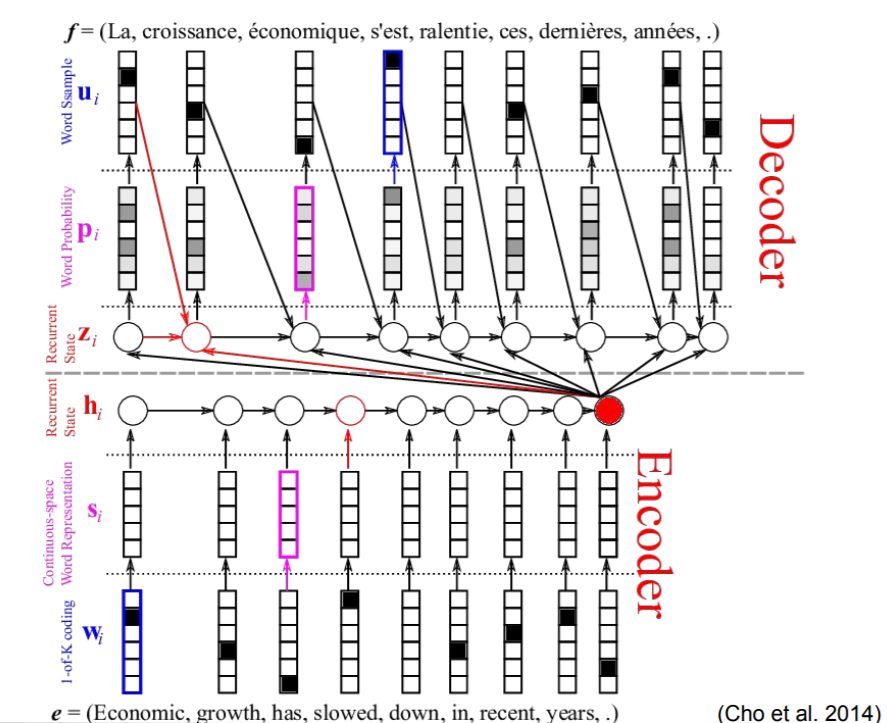

### References : 
- https://medium.com/@dev.elect.iitd/neural-machine-translation-using-word-level-seq2seq-model-47538cba8cd7 \
- https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html \
- https://stackoverflow.com/questions/50815354/seq2seq-bidirectional-encoder-decoder-in-keras \

- https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346

In [ ]:
#  initializing placeholders for input and output data
enc_input_data=np.zeros((len(X_train),max_eng_sent_length),dtype='float32')
dec_input_data=np.zeros((len(Y_train), max_german_sent_length),dtype='float32')
dec_target_data=np.zeros((len(Y_train), max_german_sent_length, tot_german_tokens),dtype='float32')

In [ ]:
# generating the data for the above created placeholders 
for i, (input_txt, target_txt) in enumerate(zip(X_train,Y_train)):
    for t, word in enumerate(nltk.word_tokenize(input_txt)):
        enc_input_data[i, t] = input_token_index[word]
    for t, word in enumerate(nltk.word_tokenize(target_txt)):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        dec_input_data[i, t] = target_token_index[word]
        if t > 0:
            #Due to the addition of ‘<bof>' to the german sentences at the start, the target data will be shifted by one.
            dec_target_data[i, t - 1, target_token_index[word]] = 1.

In [ ]:
""" from keras.layers import Input, LSTM, Embedding, Dense, Bidirectional,Concatenate
from keras.models import Model
#from keras.utils import plot_model

enc_inputs = Input(shape=(None,))
enc_embedding = Embedding(tot_eng_tokens, 50, weights= [embedding_matrix], trainable=False)(enc_inputs)


#https://stackoverflow.com/questions/50815354/seq2seq-bidirectional-encoder-decoder-in-keras
enc = Bidirectional(LSTM(50, return_state=True))
enc_outputs, forward_h, forward_c, backward_h, backward_c = enc(enc_embedding)
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])
encoder_states = [state_h, state_c]


dec_inputs = Input(shape=(None,))
dec_embedding =  Embedding(tot_german_tokens, 50 , mask_zero=True)
final_embegging= dec_embedding(dec_inputs)

decoder = LSTM(100 , return_sequences=True, return_state=True)
decoder_outputs, h, c = dec_lstm(final_embedding, initial_state=encoder_states)
decoder_dense = Dense(tot_german_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model(inputs=[enc_inputs, dec_inputs], outputs=decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Inference model
encoder_model = Model(enc_inputs, encoder_states)
decoder_state_input_h = Input(shape=(100,))
decoder_state_input_c = Input(shape=(100,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

final_embedding= dec_embedding(dec_inputs)

decoder_outputs2, state_h2, state_c2 = decoder(final_embedding, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)
decoder_model = Model([dec_inputs] + decoder_states_inputs,
                      [decoder_outputs2] + decoder_states2)
"""

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 50)     422550      input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) [(None, 128), (None, 58880       embedding_2[0][0]                
____________________________________________________________________________________________

In [ ]:
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

# Reference: https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
#            https://medium.com/@dev.elect.iitd/neural-machine-translation-using-word-level-seq2seq-model-47538cba8cd7 
#            https://www.tensorflow.org/guide/keras/masking_and_padding
#            https://stackoverflow.com/questions/47485216/how-does-mask-zero-in-keras-embedding-layer-work

#encoder inputs
enc_inputs = Input(shape=(None,))
# Embedding layer of the encoder using Glove embeddings
enc_embedding = Embedding(tot_eng_tokens, 50, weights= [embedding_matrix], trainable=False)(enc_inputs)
#LSTM layer of the encoder
encoder = LSTM(256, return_state=True)
enc_outputs, h, c = encoder(enc_embedding)
# We throw away encoder outputs and maintain only the states.
encoder_states = [h, c]

#decoder input
dec_inputs = Input(shape=(None,))

# Embedding layer of the decoder using keras Embedding layer
#https://stackoverflow.com/questions/47485216/how-does-mask-zero-in-keras-embedding-layer-work
# masking to inform layers that certain timesteps in an input are absent and should be omitted during data processing.
dec_embedding =  Embedding(tot_german_tokens, 50,mask_zero=True)
final_embedding= dec_embedding(dec_inputs)

#decoder LSTM layer
decoder = LSTM(256, return_sequences=True, return_state=True)

decoder_outputs, decoder_h, decoder_c = decoder(final_embedding, initial_state=encoder_states)
decoder_dense_layer = Dense(tot_german_tokens, activation='softmax')
decoder_outputs = decoder_dense_layer(decoder_outputs)

#Defining the model that will use `enc_input_data` & `dec_input_data` to get `dec_target_data`
model = Model(inputs=[enc_inputs, dec_inputs], outputs=decoder_outputs)
# compiling the model using rmsprop optimiser(often used for most of the NLP tasks) 
#and categorical cross entropy loss ( since it's a multi-class classification problem)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 50)     387500      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 50)     449500      input_2[0][0]                    
______________________________________________________________________________________________

In [ ]:
model.fit([enc_input_data, dec_input_data], dec_target_data,batch_size=64, epochs=15,validation_split=0.2)

Epoch 1/15
94/94 [==============================] - 76s 544ms/step - loss: 2.4892 - accuracy: 0.2191 - val_loss: 2.3002 - val_accuracy: 0.2398
Epoch 2/15
94/94 [==============================] - 49s 520ms/step - loss: 2.1250 - accuracy: 0.2435 - val_loss: 2.2556 - val_accuracy: 0.2475
Epoch 3/15
94/94 [==============================] - 48s 511ms/step - loss: 2.0426 - accuracy: 0.2478 - val_loss: 2.2216 - val_accuracy: 0.2525
Epoch 4/15
94/94 [==============================] - 48s 509ms/step - loss: 2.0200 - accuracy: 0.2492 - val_loss: 2.2236 - val_accuracy: 0.2587
Epoch 5/15
94/94 [==============================] - 48s 513ms/step - loss: 1.9267 - accuracy: 0.2602 - val_loss: 2.2088 - val_accuracy: 0.2688
Epoch 6/15
94/94 [==============================] - 49s 518ms/step - loss: 1.8716 - accuracy: 0.2768 - val_loss: 2.1384 - val_accuracy: 0.2793
Epoch 7/15
94/94 [==============================] - 49s 520ms/step - loss: 1.8316 - accuracy: 0.2829 - val_loss: 2.1276 - val_accuracy: 0.2847

## Section 3 Testing

---

**Task 5 (20 marks)**

* Use the trained model to translate the text from the source into the target language (10 marks). 
* Use the test/evaluation set (see Section 1) and perform an automatic evaluation with the BLEU metric (10 marks). 
You can use the NLTK library to calculate BLEU.

### Inference Model and testing:

- To decode a test sentence, we will repeatedly: \
  -- Encode the input sentence and retrieve the initial decoder state \
  -- Run one step of the decoder with this initial state and a "start of sequence" token as target. The output will be the next target character. \
  -- Append the target character predicted and repeat. \

### References :
- https://machinelearningmastery.com/calculate-bleu-score-for-text-python/ \
-  https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html


In [ ]:
# defining the encoder model for inference
encoder_model = Model(enc_inputs, encoder_states)

# redefining the decoder model for inference
decoder_h = Input(shape=(256,))
decoder_c = Input(shape=(256,))
decoder_states_inputs = [decoder_h, decoder_c]

final_embedding= dec_embedding(dec_inputs)

decoder_outputs2, h2, c2 = decoder(final_embedding, initial_state=decoder_states_inputs)
decoder_states2 = [h2, c2]
decoder_outputs2 = decoder_dense_layer(decoder_outputs2)

# The encoder states and decoder input will be sent into the sampling model, which will produce predictions.
decoder_model = Model([dec_inputs] + decoder_states_inputs,
                      [decoder_outputs2] + decoder_states2)

In [ ]:
# reverse-lookup token index to turn sequences back to words
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

# Reference : https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html

def translation(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['bof_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
   
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token        
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_eos' or
           len(decoded_sentence) > 12):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]
        
    return decoded_sentence

In [ ]:
# Create placeholder variables for our test embeddings
encoder_input_data_test = np.zeros((len(X_test), max_eng_sent_length), dtype='float32')

# populating the test place holders
for i, (input_text, target_text) in enumerate(zip(X_test, Y_test)):
    for t, word in enumerate(nltk.word_tokenize(input_text)):
        encoder_input_data_test[i, t] = input_token_index[word]

In [ ]:
for i in [1,5,10,15,20,25,30,35,40,45,50]:
    input_seq = enc_input_data[i: i + 1]
    output_sentence = translation(input_seq)
    print('\n')
    print('Input sentence:', X_train[i: i + 1])
    print('Decoded sentence:', output_sentence)




Input sentence: ['scales']
Decoded sentence:  _eos


Input sentence: ['besonders diese sind ideal fur halloween kostume geeignet']
Decoded sentence:  diese diese anderen


Input sentence: ['approx mio eu subsidies']
Decoded sentence:  gesamt km bbs


Input sentence: ['august']
Decoded sentence:  september _eos


Input sentence: ['back to czech restaurants in nordrheinwestfalen']
Decoded sentence:  mehr in in in


Input sentence: ['if he has gills he may suffocate']
Decoded sentence:  er wird es in


Input sentence: ['come']
Decoded sentence:  los _eos


Input sentence: ['youre being vindictive']
Decoded sentence:  sie bist nicht


Input sentence: ['re quote quizz']
Decoded sentence:  es ist pm _eos


Input sentence: ['']
Decoded sentence:  _eos


Input sentence: ['theyre coming in']
Decoded sentence:  sie ist nur hier


In [ ]:
#Reference : https://machinelearningmastery.com/calculate-bleu-score-for-text-python/

#Translating the sentences in test corpora
original_sequence, predicted_sequence = list(), list()
for i in range(len(encoder_input_data_test)):
    input_seq = encoder_input_data_test[i:i + 1]
    decoded_sent = translation(input_seq)
    predicted_sequence.append(nltk.word_tokenize(decoded_sent))
    original_sequence.append([nltk.word_tokenize(Y_test[i])])

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
print("BLEU Score on Test Set : ")
print('BLEU-1: %f' % corpus_bleu(original_sequence, predicted_sequence, weights=(1.0, 0, 0, 0)))

BLEU Score on Test Set : 
BLEU-1: 0.135583


# Section 4 Attention

---



**Task 5 (40 Marks)** Sequence2Sequence

* Extend the existing Seq2Seq model with an attention mechanism [Discussed in Class]
* Create sequence2sequence model with attention (15 marks)
* Train the model with the same data from Section 1 (10 marks)
* Translate the evaluation set using the sequence2sequence attention model (10 marks)
* Evaluate the translations made with the sequence2sequence attention model and compare it with the model without attention using BLEU (5 marks)

### Attention Mechanism

- After LSTMs, the latest and next significant thing in NLP is attention, which is producing a huge rise in RNN performance on real-world issues. \

- Attention compensates for the fact that an LSTM can only operate with the output of the preceding time-step. 

- Attention introduces a new intermediate step: each LSTM time-step receives information from each of the preceding LSTM time-step. 

- It can be implemented as a weighted sum of the data from the previous levels. such that the layer learns which prior states it should pay attention to and which it should ignore . It's even plausible for a layer to totally ignore the layer immediately preceding it in favour of layers earlier in the time sequence if it has enough attention.  \

- Particularly for long sentences attention is very effective it will concentrate on the selective part of the sentence to focus on. \

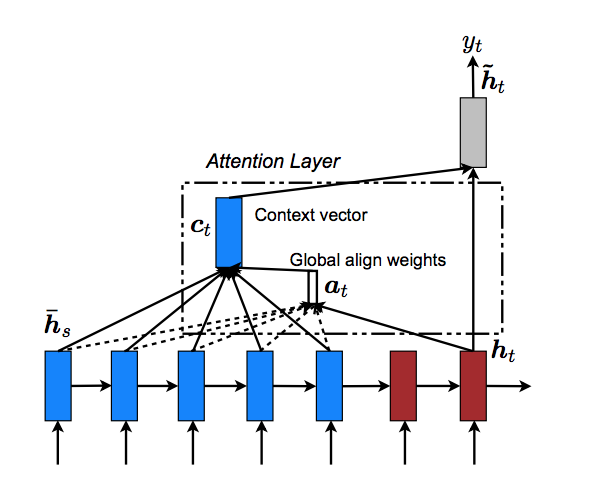

### References:
- Minh-Thang Luong, Hieu Pham, and Christopher D Manning. Effective approaches to attentionbased neural machine translation. arXiv preprint arXiv:1508.04025, 2015.
- https://towardsdatascience.com/attention-based-neural-machine-translation-b5d129742e2c
- https://www.kaggle.com/residentmario/seq-to-seq-rnn-models-attention-teacher-forcing 

In [ ]:
from keras.layers import Activation, dot, concatenate
from keras.layers import Input, Embedding, LSTM, TimeDistributed, Dense

# encoder input layer of attention model
attention_encoder_input = Input(shape=(max_eng_sent_length,))
#embedding layer of the encoder using Glove embeddings
attention_encoder = Embedding(tot_eng_tokens, 50 , weights= [embedding_matrix], trainable=False)(attention_encoder_input) 
# LSTM layer of the encoder
attention_encoder = LSTM(256, return_sequences=True, unroll=True)(attention_encoder) 
# The encoder's last word is sent into the decoder's input.
attention_encoder_last = attention_encoder[:,-1,:]  

#decoder input layer of attention model
attention_decoder_input = Input(shape=(max_german_sent_length,))
# embedding layer of decoder created using Keras Embedding layer
attention_decoder = Embedding(tot_german_tokens, 50)(attention_decoder_input)
# LSTM layer of the decoder
#https://stackoverflow.com/questions/57187478/is-the-kerass-default-lstm-unrolled-or-stateful
#unrolling for short sequences improves processing speed at the expense of memory usage.
attention_decoder = LSTM(256, return_sequences=True, unroll=True)(attention_decoder, nitial_state=[attention_encoder_last, attention_encoder_last])

# weights of the encoder and decoder as a dot product to get attention
attention = dot([attention_decoder, attention_encoder], axes=[2, 2])
# The softmax function  gives the probability distribution which can used as attention weights
attention = Activation('sigmoid', name='attention')(attention)
# pre attention weight and encoder as a dot product to give context
context = dot([attention, attention_encoder], axes=[2,1])
# context concatenated with decoder
decoder_combined_contxt = concatenate([context, attention_decoder])

# Time distributed layer with tanh activation
output = TimeDistributed(Dense(64, activation="relu"))(decoder_combined_contxt)
#Time distributed softmax function to calculate the probability distirbution of the output words sequence
output = TimeDistributed(Dense(tot_german_tokens, activation="softmax"))(output)

In [ ]:
#defining the model
attention_model = Model(inputs =[attention_encoder_input, attention_decoder_input], outputs =[output])
attention_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
attention_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 10)]         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 10, 50)       387500      input_11[0][0]                   
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 12)]         0                                            
__________________________________________________________________________________________________
lstm_8 (LSTM)                   (None, 10, 256)      314368      embedding_8[0][0]                
____________________________________________________________________________________________

In [ ]:
#Training the model
attention_model.fit([enc_input_data, dec_input_data], dec_target_data,
          batch_size=64,
          epochs=15,
          validation_split=0.2)

Epoch 1/15
94/94 [==============================] - 72s 530ms/step - loss: 2.5263 - accuracy: 0.6756 - val_loss: 2.2422 - val_accuracy: 0.7261
Epoch 2/15
94/94 [==============================] - 46s 486ms/step - loss: 2.1199 - accuracy: 0.7187 - val_loss: 2.2404 - val_accuracy: 0.7276
Epoch 3/15
94/94 [==============================] - 46s 487ms/step - loss: 1.9570 - accuracy: 0.7241 - val_loss: 2.2058 - val_accuracy: 0.7312
Epoch 4/15
94/94 [==============================] - 46s 485ms/step - loss: 1.8441 - accuracy: 0.7280 - val_loss: 2.2074 - val_accuracy: 0.7302
Epoch 5/15
94/94 [==============================] - 45s 482ms/step - loss: 1.7285 - accuracy: 0.7323 - val_loss: 2.2255 - val_accuracy: 0.7361
Epoch 6/15
94/94 [==============================] - 46s 491ms/step - loss: 1.6673 - accuracy: 0.7308 - val_loss: 2.1757 - val_accuracy: 0.7403
Epoch 7/15
94/94 [==============================] - 46s 488ms/step - loss: 1.5656 - accuracy: 0.7384 - val_loss: 2.1936 - val_accuracy: 0.7417

In [ ]:
# reverse-lookup token index to turn sequences back to words
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

In [ ]:
#function to translate input sequence to target language using attention
def translation_attention(input_seq):
    translated_sentence = ''
    enc_input = input_seq.reshape(1,max_eng_sent_length)
    #initialising numpy matrix of required dimensions
    dec_input = np.zeros(shape=(len(enc_input), max_german_sent_length))
    #bof_ is the first entry of the decoder input
    dec_input[:,0] = target_token_index['bof_']
    for i in range(1, max_german_sent_length):
        output = attention_model.predict([enc_input, dec_input]).argmax(axis=2)
        dec_input[:,i] = output[:,i]
    for k in dec_input[0]:
        #condition to break out of the loop(i.e if we see the end(_eos) token)    
        if (reverse_target_char_index[k] == '_eos'):
            translated_sentence += ' '+reverse_target_char_index[k]
            break
        translated_sentence += ' '+reverse_target_char_index[k]
    return translated_sentence

In [ ]:
#Displaying few translations from the training set
for i in [1,2,4,6,8,10,12,20,22,24]:
    input_seq = enc_input_data[i: i+ 1]
    translated_sentence = translation_attention(input_seq)
    print('\n')
    print('Input sentence:', X_train[i: i + 1])
    print('Translated sentence:', translated_sentence)



Input sentence: ['scales']
Translated sentence:  bof_ _eos


Input sentence: ['has decided as follows']
Translated sentence:  bof_ hat may _eos


Input sentence: ['no its not okay']
Translated sentence:  bof_ es es _eos


Input sentence: ['i think thats the last ever']
Translated sentence:  bof_ ich es es _eos


Input sentence: ['you you kids go ahead and have fun']
Translated sentence:  bof_ du du etwa _eos


Input sentence: ['approx mio eu subsidies']
Translated sentence:  bof_ eufordermittel mio mio mio _eos


Input sentence: ['your favours are all used up']
Translated sentence:  bof_ die die und und und _eos


Input sentence: ['back to czech restaurants in nordrheinwestfalen']
Translated sentence:  bof_ back turkish restaurants nordrheinwestfalen _eos


Input sentence: ['production in heinsberg also saves long transport routes']
Translated sentence:  bof_ produktion in museum in _eos


Input sentence: ['what about your boat']
Translated sentence:  bof_ wie deine _eos


In [ ]:
#Translating the sentences in test data set
original_sequence_att, predicted_sequence_att = list(), list()
for i in range(len(encoder_input_data_test)):
    input_seq = encoder_input_data_test[i: i + 1]
    decoded_sent = translation_attention(input_seq)
    predicted_sequence_att.append(nltk.word_tokenize(decoded_sent))
    original_sequence_att.append([nltk.word_tokenize(Y_test[i])])

In [ ]:
print("BLEU Score on Test set:")
print('BLEU-1: %f' % corpus_bleu(original_sequence_att, predicted_sequence_att, weights=(1.0, 0, 0, 0)))

BLEU Score on Test set:
BLEU-1: 0.397368


### Conclusion:
 We can observe that the BLEU score for the model with attention are better that of model without attention. There are few other methods through which we can enhance the performance of this task. Usually most of the deep learning tasks are data hungry, so training the model with more data will definitely be more helpful. However it's really hard to train such models with huge data using normal processors that we have in our systems, so adapting transfer learning and taking weights of those pre-trained models could be much better to increase the performnace.

## References:
1) https://machinelearningmastery.com/develop-neural-machine-translation-system-keras/

2) https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

3) https://medium.com/@dev.elect.iitd/neural-machine-translation-using-word-level-seq2seq-model-47538cba8cd7 

4) https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html 

5) https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346

6) https://stackoverflow.com/questions/50815354/seq2seq-bidirectional-encoder-decoder-in-keras

7) https://machinelearningmastery.com/calculate-bleu-score-for-text-python/

8)Minh-Thang Luong, Hieu Pham, and Christopher D Manning. Effective approaches to attentionbased neural machine translation. arXiv preprint arXiv:1508.04025, 2015.

9) https://towardsdatascience.com/attention-based-neural-machine-translation-b5d129742e2c

10) https://www.kaggle.com/residentmario/seq-to-seq-rnn-models-attention-teacher-forcing 

11) Week7 and Week8 Labs of CT5121-Advanced Topics in NLP.

12) Sequence Models Course (in Deep Learning Specilization) on Coursera by Prof.Andrew NG.

13)https://stackoverflow.com/questions/57187478/is-the-kerass-default-lstm-unrolled-or-stateful

14) https://www.tensorflow.org/guide/keras/masking_and_padding

15) https://stackoverflow.com/questions/47485216/how-does-mask-zero-in-keras-embedding-layer-work